In [1]:
import numpy as np
import os
import PIL # Python Imaging Library, deprecated, Pillow is the successor
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import keras

print(tf.__version__)

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE)

c:\Users\jtros\CS\assos\automatants\summer2022\ProjetsAutomatants\venv_CVProjects\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.9.1


img.shape at first: (480, 500, 3)
img.shape after max pooling: (120, 125, 3)
img.shape after avg pooling: (120, 125, 3)
img.shape at first: (361, 250, 3)
img.shape after max pooling: (91, 63, 3)
img.shape after avg pooling: (91, 63, 3)
img.shape at first: (576, 720, 3)
img.shape after max pooling: (144, 180, 3)
img.shape after avg pooling: (144, 180, 3)


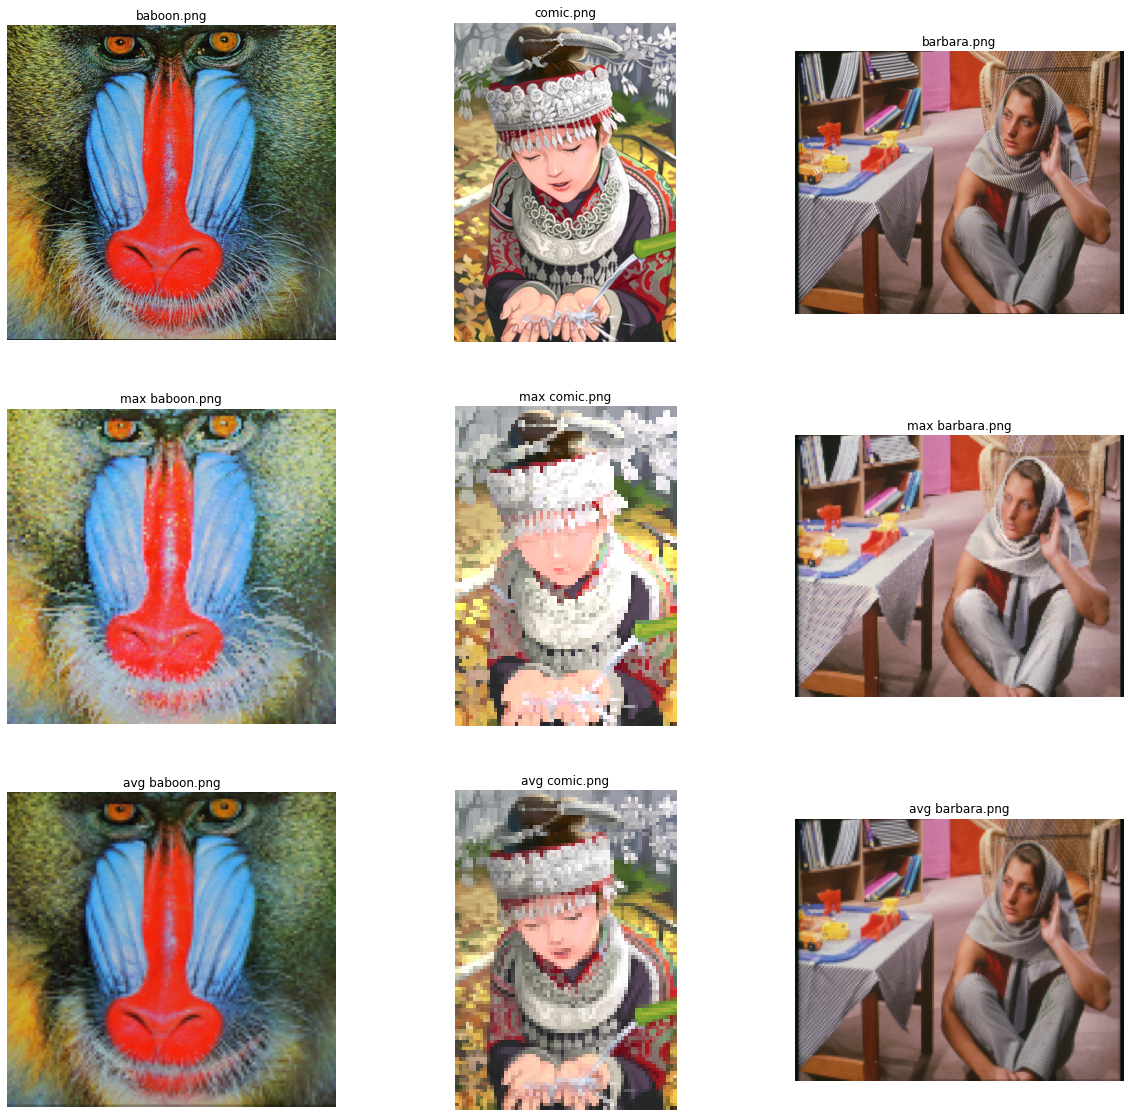

In [12]:
# pip install opencv-python
from numpy import dtype
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2


folder = "C:/Users/jtros/CS/assos/automatants/summer2022/ProjetsAutomatants/Super-resolution/datasets/refences/Set14"
plt.figure(figsize=(20, 20))

max_pooling_2d = tf.keras.layers.MaxPooling2D((4,4),padding="same")
avg_pooling_2d = tf.keras.layers.AveragePooling2D((4,4),padding="same")

# for i,file_path in enumerate(os.listdir(folder)):
for i,file_path in enumerate(['baboon.png','comic.png','barbara.png']):
    if i in [0,1,2]: 
        # get image
        abs_file_path = os.path.join(folder,file_path)
        img = tf.io.read_file(abs_file_path)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.cast(img,dtype=DTYPE)
        print("img.shape at first:",img.shape)
        img_np = img.numpy()

        # print image
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img_np.astype("uint8"))
        plt.title(file_path)
        plt.axis("off")

        # apply max-pooling
        # img = tf.expand_dims(img,axis=-1)
        img = tf.expand_dims(img,axis=0)
        img_mxp2d = max_pooling_2d(img)
        img_mxp2d = tf.squeeze(img_mxp2d)
        print("img.shape after max pooling:",img_mxp2d.shape)
        img_mxp2d_np = img_mxp2d.numpy()
        ax = plt.subplot(3,3,i+1+3)
        plt.imshow(img_mxp2d_np.astype("uint8"))
        plt.title('max '+file_path)
        plt.axis("off")

        # apply average-pooling
        ax = plt.subplot(3,3,i+1+6)
        # img = tf.expand_dims(img,axis=-1)
        # print(img.shape)
        img_avg2d = avg_pooling_2d(img)
        img_avg2d = tf.squeeze(img_avg2d)
        print("img.shape after avg pooling:",img_avg2d.shape)
        img_avg2d_np = img_avg2d.numpy()
        plt.imshow(img_avg2d_np.astype("uint8"))
        plt.title('avg '+file_path)
        plt.axis("off")


# luckily the images kept are the first of each capture event

Clearly average pooling is more realistic and will be the one used to under sample images and construct the training set.